# Python imports

In [1]:
# Show plots as part of the notebook (this is a Jupyter-specific operation)
%matplotlib inline
import time
import matplotlib.pyplot as plt
import requests
import xmltodict
# Standard library packages
import os

# Import Pandas and Seaborn
import pandas as pd
import seaborn as sns

# Import Biopython tools for running local BLASTX
from Bio.Blast.Applications import NcbiblastxCommandline
from Bio.Blast.Applications import NcbiblastnCommandline

In [2]:
from datetime import datetime
from pytz import timezone

now_time = datetime.now(timezone('America/Chicago'))
print(now_time.strftime('%I:%M:%S %p'))

11:02:28 PM


In [ ]:
#blastn -task blastn -query example/unknown.fa -db db/bacteria/bacteria_nucl -out example/blastn_bacteria.out

# Running and analyzing a local BLASTN search for Nov112020-ALL-R1.fasta

In [7]:
cmd_blastn = NcbiblastnCommandline(query='Nov112020-ALL-R1.fasta',
                      out='Nov112020-ALL-R1_blastn.tab',
                      outfmt=6,
                      db='db_ref_ALL_16S/db_ref_ALL_16S',
                      num_threads = 64)

In [8]:
# Get a working command-line
print(cmd_blastn)

blastn -out Nov112020-ALL-R1_blastn.tab -outfmt 6 -query Nov112020-ALL-R1.fasta -db db_ref_ALL_16S/db_ref_ALL_16S -num_threads 64


In [9]:
%%time
cmd_blastn()

CPU times: user 773 ms, sys: 497 ms, total: 1.27 s
Wall time: 4h 49min 52s


('', '')

In [ ]:
##https://widdowquinn.github.io/2018-03-06-ibioic/02-sequence_databases/03-programming_for_blast.html#runblastx
# Run BLASTX, and catch STDOUT/STDERR
# !! Do not execute cell if skipping computation !!
#stdout, stderr = cmd_blastn()

# Check STDOUT, STDERR
#print("STDOUT: %s" % stdout)
#print("STDERR: %s" % stderr)

# EDA for BLAST Results: "Nov112020-ALL-R1_blastn.tab"

In [3]:
# !! If you are skipping computational steps, uncomment the line below !!
#blastout = os.path.join('prepped', 'kitasatospora', 'AMK19_00175_blastx_kitasatospora.tab')  # BLAST output

# Read BLASTX output
results = pd.read_csv("Nov112020-ALL-R1_blastn.tab", sep="\t", header=None)

In [4]:
# Inspect results table
results.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,A00842:193:HMWFWDRXY:1:2101:25418:1016,MN240357.1,100.000,28,0,0,113,140,22180,22207,4.040000e-06,52.8
1,A00842:193:HMWFWDRXY:1:2101:18267:1031,NC_028502.1,87.755,147,18,0,1,147,89967,90113,2.970000e-42,172.0
2,A00842:193:HMWFWDRXY:1:2101:18267:1031,KR336545.1,87.755,147,18,0,1,147,89967,90113,2.970000e-42,172.0
3,A00842:193:HMWFWDRXY:1:2101:18267:1031,NC_058274.1,85.714,147,21,0,1,147,84675,84821,2.990000e-37,156.0
4,A00842:193:HMWFWDRXY:1:2101:18267:1031,MW899036.1,85.714,147,21,0,1,147,84675,84821,2.990000e-37,156.0


In [5]:
# Define column headers
headers = ['query', 'subject',
           'pc_identity', 'aln_length', 'mismatches', 'gaps_opened',
           'query_start', 'query_end', 'subject_start', 'subject_end',
           'e_value', 'bitscore']

# Assign headers
results.columns = headers

# Inspect modified table
results.head()

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,A00842:193:HMWFWDRXY:1:2101:25418:1016,MN240357.1,100.000,28,0,0,113,140,22180,22207,4.040000e-06,52.8
1,A00842:193:HMWFWDRXY:1:2101:18267:1031,NC_028502.1,87.755,147,18,0,1,147,89967,90113,2.970000e-42,172.0
2,A00842:193:HMWFWDRXY:1:2101:18267:1031,KR336545.1,87.755,147,18,0,1,147,89967,90113,2.970000e-42,172.0
3,A00842:193:HMWFWDRXY:1:2101:18267:1031,NC_058274.1,85.714,147,21,0,1,147,84675,84821,2.990000e-37,156.0
4,A00842:193:HMWFWDRXY:1:2101:18267:1031,MW899036.1,85.714,147,21,0,1,147,84675,84821,2.990000e-37,156.0


In [6]:
# Show a summary of the results table data
results.describe()

,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
count,5.236909e+07,5.236909e+07,5.236909e+07,5.236909e+07,5.236909e+07,5.236909e+07,5.236909e+07,5.236909e+07,5.236909e+07,5.236909e+07
mean,9.068401e+01,1.220127e+02,1.082300e+01,9.475163e-01,1.131649e+01,1.317143e+02,6.598661e+04,6.598679e+04,2.407423e-08,1.584538e+02
std,4.996050e+00,3.497397e+01,6.723314e+00,1.574886e+00,2.160333e+01,2.922587e+01,1.920402e+05,1.920402e+05,1.520291e-05,5.256762e+01
min,7.284800e+01,2.400000e+01,0.000000e+00,0.000000e+00,1.000000e+00,2.600000e+01,1.000000e+00,1.000000e+00,1.700000e-74,3.810000e+01
25%,8.739500e+01,9.800000e+01,5.000000e+00,0.000000e+00,1.000000e+00,1.220000e+02,1.308000e+03,1.293000e+03,4.900000e-50,1.170000e+02
50%,9.103400e+01,1.390000e+02,1.000000e+01,0.000000e+00,1.000000e+00,1.480000e+02,3.299700e+04,3.299600e+04,2.310000e-38,1.590000e+02
75%,9.420300e+01,1.510000e+02,1.500000e+01,1.000000e+00,9.000000e+00,1.510000e+02,9.374900e+04,9.374300e+04,1.410000e-25,1.980000e+02
max,1.000000e+02,1.810000e+02,4.100000e+01,2.000000e+01,1.240000e+02,1.510000e+02,6.574866e+06,6.574882e+06,1.100000e-01,2.790000e+02


In [7]:
# Show all subject matches
print(results['subject'])

0            MN240357.1
1           NC_028502.1
2            KR336545.1
3           NC_058274.1
4            MW899036.1
               ...     
52369083     KX828176.1
52369084     AP018038.1
52369085     KX131180.1
52369086     KX756229.1
52369087     MK995333.1
Name: subject, Length: 52369088, dtype: object


In [8]:
results.shape

(52369088, 12)

## Filter BLASTn Results (E-Value < 10 ^ -20 & pc_identity >= 99.00)

In [9]:
results_target_ev = results.loc[results['e_value'] < 1e-20]

In [10]:
results_target_ev.shape

(43888110, 12)

In [11]:
results_target_pci = results_target_ev.loc[results_target_ev['pc_identity'] >= 99.00]

In [12]:
results_target_pci.shape

(1093973, 12)

In [13]:
results_target_pci.head()

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
17,A00842:193:HMWFWDRXY:1:2101:26286:1047,X78276.1,100.0,58,0,0,1,58,58,1,8.500000e-23,108.0
18,A00842:193:HMWFWDRXY:1:2101:26286:1047,X53904.1,100.0,58,0,0,1,58,58,1,8.500000e-23,108.0
20,A00842:193:HMWFWDRXY:1:2101:26286:1047,X79498.1,100.0,57,0,0,1,57,58,2,3.060000e-22,106.0
21,A00842:193:HMWFWDRXY:1:2101:26286:1047,X79497.1,100.0,57,0,0,1,57,58,2,3.060000e-22,106.0
22,A00842:193:HMWFWDRXY:1:2101:26286:1047,X79496.1,100.0,57,0,0,1,57,58,2,3.060000e-22,106.0


In [14]:
results_target_pci.to_csv('01_db_blastn_Nov112020_filtered_1e-20_99perc-id_subj.csv', index=False)

In [15]:
%%time
df = pd.read_csv('01_db_blastn_Nov112020_filtered_1e-20_99perc-id_subj.csv')

CPU times: user 528 ms, sys: 66.6 ms, total: 595 ms
Wall time: 593 ms


In [16]:
df.shape

(1093973, 12)

In [17]:
df.head()

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,A00842:193:HMWFWDRXY:1:2101:26286:1047,X78276.1,100.0,58,0,0,1,58,58,1,8.500000e-23,108.0
1,A00842:193:HMWFWDRXY:1:2101:26286:1047,X53904.1,100.0,58,0,0,1,58,58,1,8.500000e-23,108.0
2,A00842:193:HMWFWDRXY:1:2101:26286:1047,X79498.1,100.0,57,0,0,1,57,58,2,3.060000e-22,106.0
3,A00842:193:HMWFWDRXY:1:2101:26286:1047,X79497.1,100.0,57,0,0,1,57,58,2,3.060000e-22,106.0
4,A00842:193:HMWFWDRXY:1:2101:26286:1047,X79496.1,100.0,57,0,0,1,57,58,2,3.060000e-22,106.0


In [18]:
df['subject'].nunique()

6000

### Retrieving (efetch) scientific name (GBSeq_definition) from NCBI nucleotide database (nuccore)
#### seq id header in each 16S fasta sequences of built database which were succsessfully blasted (subject column) will be translated into the corresponding "Genus species" name

In [19]:
base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/{}"
db = "nuccore"

In [20]:
def get_taxon_name(tax_id):
    try:
        efetch = "efetch.fcgi?db={}&id={}&rettype=json".format(db, tax_id)
        efetch_response = requests.get(base_url.format(efetch))
        efetch_dict = xmltodict.parse(efetch_response.content)
        Definition = efetch_dict['GBSet']['GBSeq']['GBSeq_definition']
        Definition = Definition.split(',')
        Definition = Definition[0]
        time.sleep(0.5)
    except:
        Definition = tax_id
        pass
 
    return Definition

In [21]:
def enrich_dataset(df):
    taxon_value = df['subject']
    ScientificName = get_taxon_name(taxon_value)
    df['taxon_name'] = ScientificName
    return df

In [22]:
df = df['subject'].value_counts()
df = pd.Series(df)
df.to_csv('02_Nov112020-ALL-R1_blastn_1e-20_99perc-id.csv')

In [23]:
df = pd.read_csv('02_Nov112020-ALL-R1_blastn_1e-20_99perc-id.csv')
df.columns.values[0] = "subject"
df.columns.values[1] = "count"

In [24]:
df.head()

,subject,count
0,NC_046447.1,5087
1,MK107984.1,5085
2,MK107985.1,5085
3,NC_016735.1,5051
4,FM957154.1,5023


In [25]:
df.shape

(6000, 2)

In [26]:
%%time
df = df.apply(enrich_dataset, axis=1)

CPU times: user 3min 19s, sys: 27 s, total: 3min 46s
Wall time: 1h 48min 33s


In [27]:
df.to_csv('03_Nov112020-ALL-R1_blastn_1e-20_99perc-id_taxonomy.csv', index=False)

In [28]:
df = pd.read_csv('03_Nov112020-ALL-R1_blastn_1e-20_99perc-id_taxonomy.csv')

In [29]:
df.shape

(6000, 3)

In [30]:
df.describe()

,count
count,6000.000000
mean,182.328833
std,620.922887
min,1.000000
25%,4.000000
50%,19.000000
75%,100.000000
max,5087.000000


In [31]:
df.head(50)

,subject,count,taxon_name
0,NC_046447.1,5087,Scytosiphon promiscuus plastid
1,MK107984.1,5085,Scytosiphon promiscuus plastid
2,MK107985.1,5085,Scytosiphon promiscuus plastid
3,NC_016735.1,5051,Fucus vesiculosus chloroplast
4,FM957154.1,5023,Fucus vesiculosus complete chloroplast genome
5,NC_029856.1,4989,NC_029856.1
6,MT795188.1,4987,Sargassum horneri isolate JD chloroplast
7,MN265366.1,4987,Sargassum horneri chloroplast
8,MT795189.1,4987,Sargassum horneri isolate SC chloroplast
9,MT800998.1,4986,Sargassum hemiphyllum var. chinense voucher Wu...


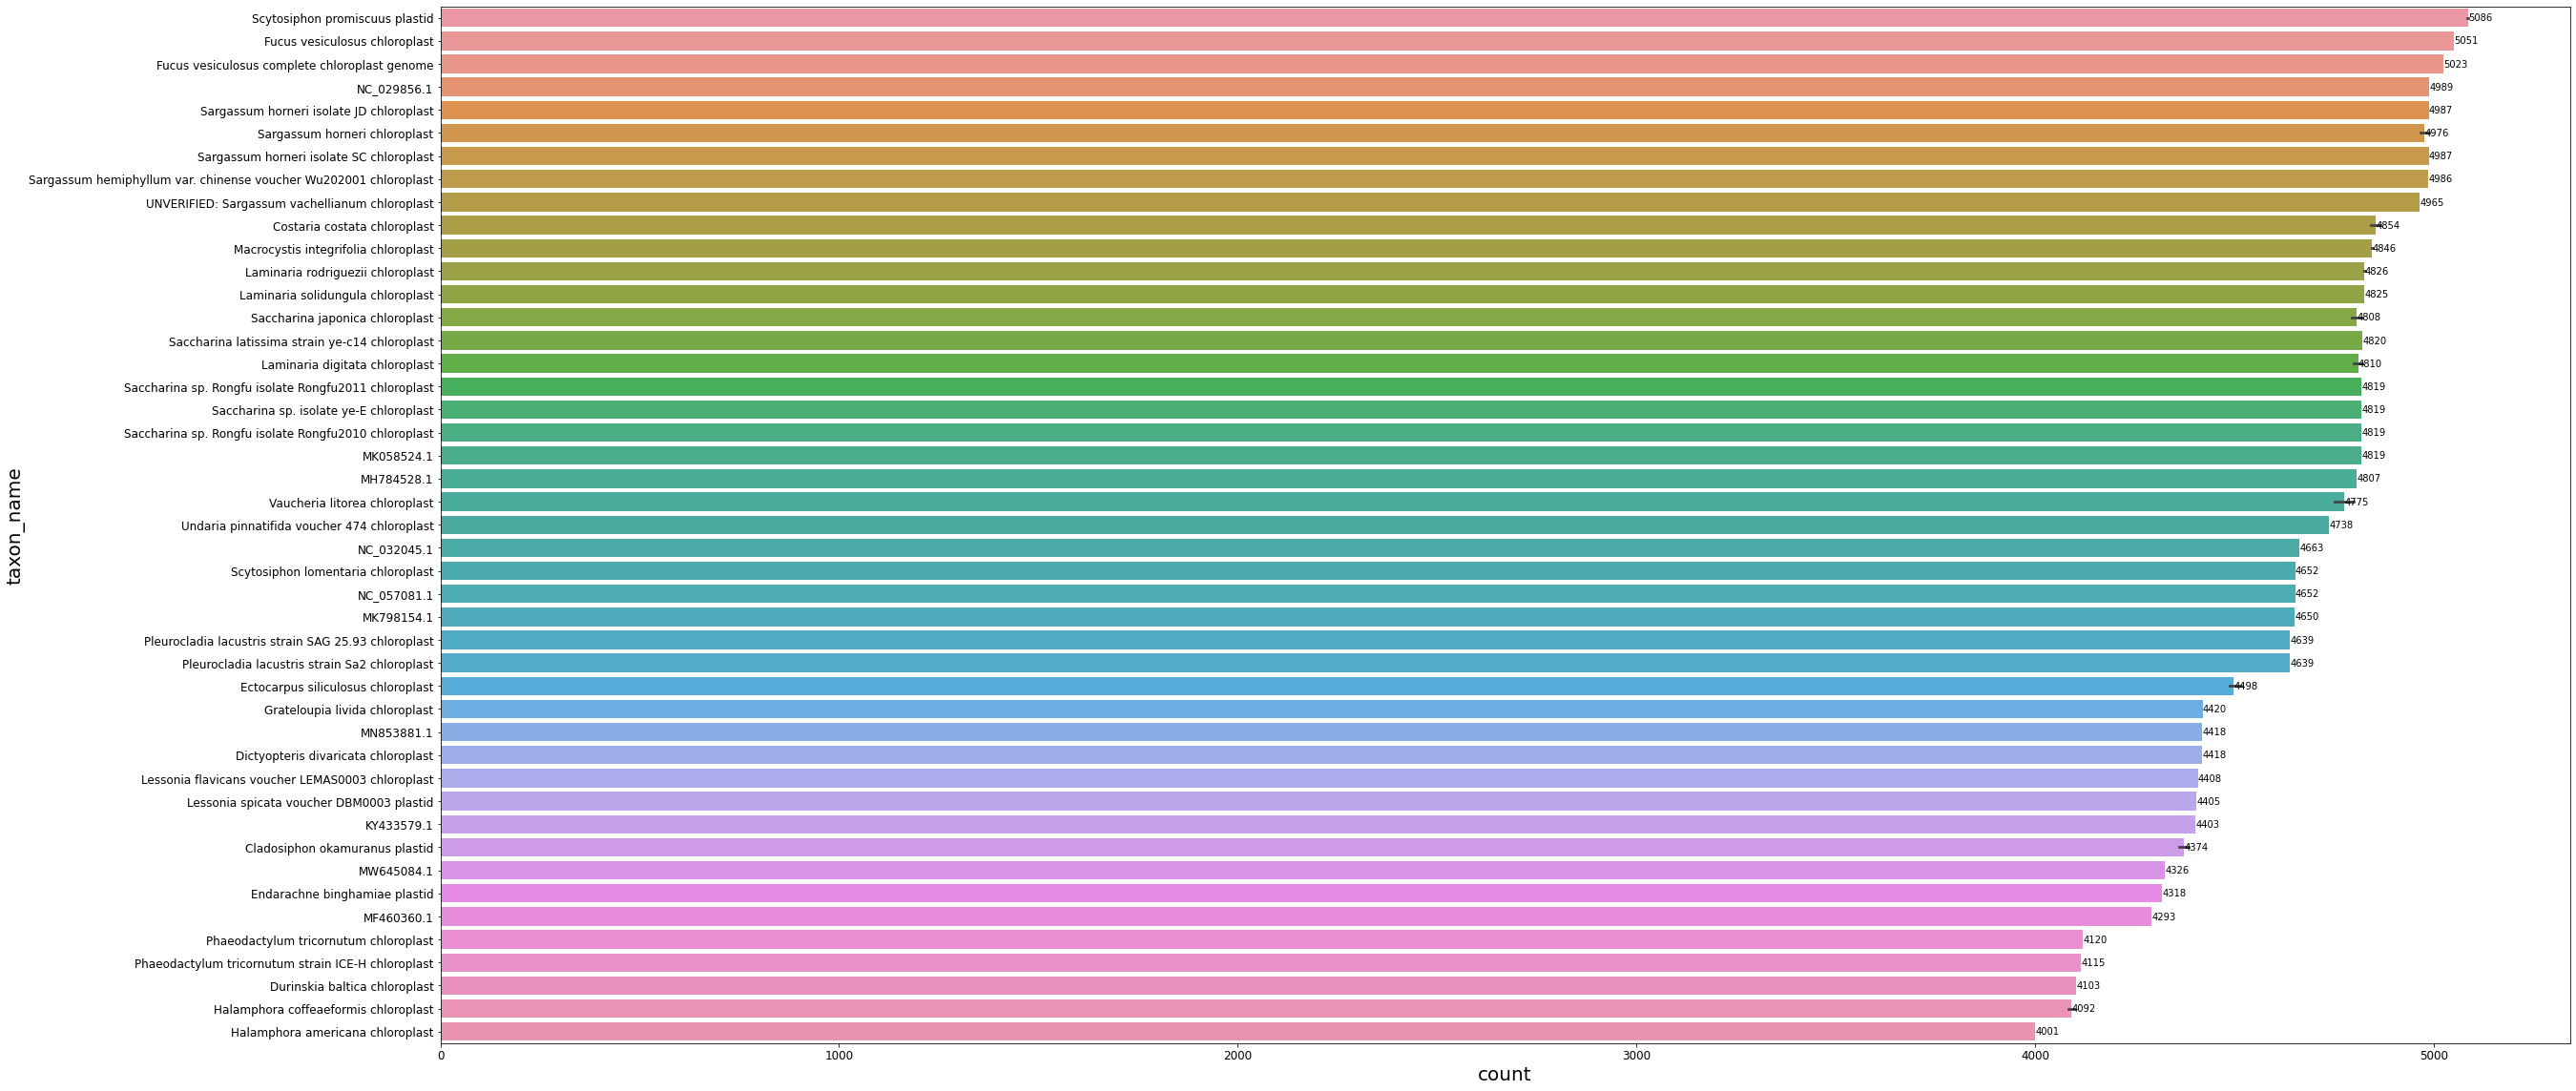

In [35]:
plt.figure(figsize = (40,20))
ax = sns.barplot(y='taxon_name', x='count', data=df[df['count'] >= 4000])
ax.set_xlabel("count",fontsize=20)
ax.set_ylabel("taxon_name",fontsize=20)
ax.tick_params(axis='x', labelsize = 12)
ax.tick_params(axis='y', labelsize = 12)

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')
    
#plt.savefig('03_Nov112020_1e-20.jpeg', dpi=700)